In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
from IPython.display import HTML
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
calories_data = pd.read_csv('/content/drive/MyDrive/New data/calories_data.csv')


In [7]:
calories_data.head()

,user_id,gender,age,height,weight,duration,heart_rate,body_temp,user_id.1,calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [8]:
calories_data.tail()

,user_id,gender,age,height,weight,duration,heart_rate,body_temp,user_id.1,calories
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,15644082,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,17212577,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,17271188,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,18643037,11.0
14999,11751526,0,63,173.0,79.0,18.0,92.0,40.5,11751526,98.0


In [9]:
calories_data.columns

Index(['user_id', 'gender', 'age', 'height', 'weight', 'duration',
       'heart_rate', 'body_temp', 'user_id.1', 'calories'],
      dtype='object')

In [10]:
calories_data.describe()

,user_id,gender,age,height,weight,duration,heart_rate,body_temp,user_id.1,calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,1.497736e+07,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,2.872851e+06,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000116e+07,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,1.247419e+07,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,1.499728e+07,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,1.744928e+07,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,1.999965e+07,314.000000


In [11]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     15000 non-null  int64  
 1   gender      15000 non-null  int64  
 2   age         15000 non-null  int64  
 3   height      15000 non-null  float64
 4   weight      15000 non-null  float64
 5   duration    15000 non-null  float64
 6   heart_rate  15000 non-null  float64
 7   body_temp   15000 non-null  float64
 8   user_id.1   15000 non-null  int64  
 9   calories    15000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.1 MB


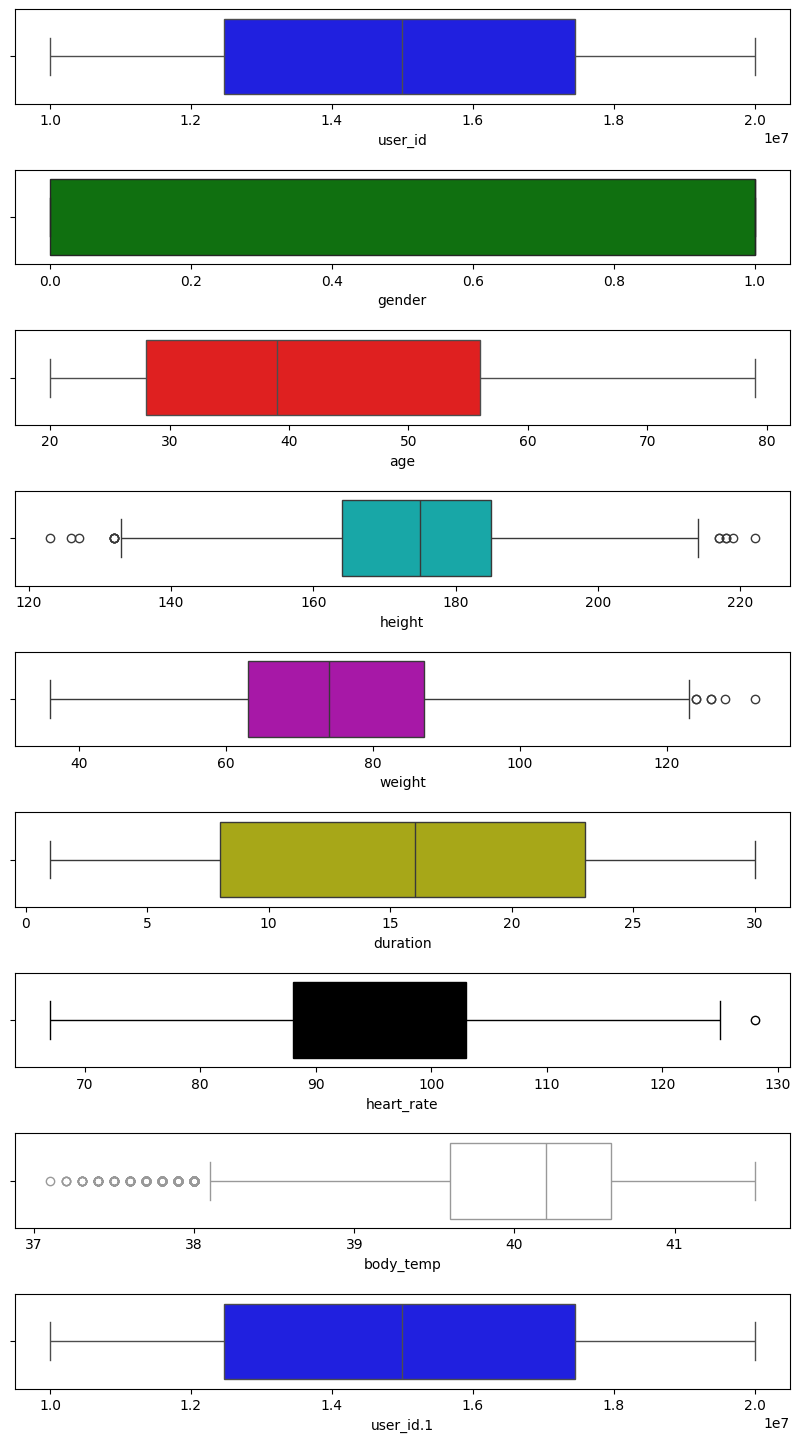

In [12]:
c= ['b','g','r','c','m','y','k','w','b']
fig1 ,axes = plt.subplots(len(calories_data.columns),1, figsize = (10,20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
axes = axes.flatten()
for i, column in zip(range(len(calories_data.columns)), calories_data.columns):
  try:
    sns.boxplot(data = calories_data, x= column, color= c[i], ax=axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

<Axes: >

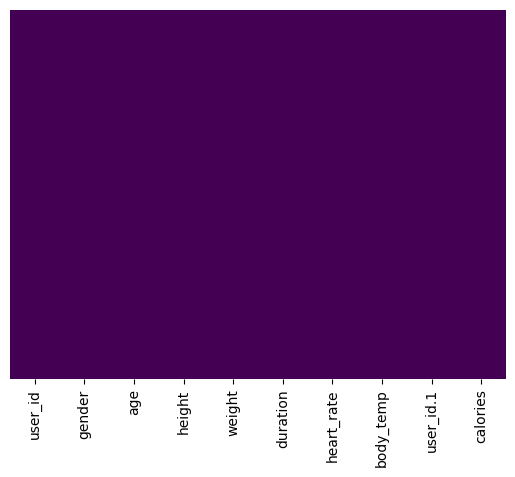

In [13]:
sns.heatmap(calories_data.isnull(), yticklabels = False, cbar = False, cmap= 'viridis')

In [14]:
print("The shape of dataset before dropping duplicates:", calories_data.shape)
calories_data.drop_duplicates(subset=['user_id'], keep='last', inplace=True)
print("The shape of dataset after dropping duplicates:", calories_data.shape)

The shape of dataset before dropping duplicates: (15000, 10)
The shape of dataset after dropping duplicates: (15000, 10)


In [15]:
calories_data.drop(columns = 'user_id', inplace=True)

In [43]:
calories_data.drop(columns = 'user_id.1', inplace=True)

In [44]:
calories_train,calories_test= train_test_split(calories_data, test_size= 0.2, random_state= 1)
print("shape of training data:", calories_train.shape)
print("shape of test data:", calories_test.shape)

shape of training data: (12000, 8)
shape of test data: (3000, 8)


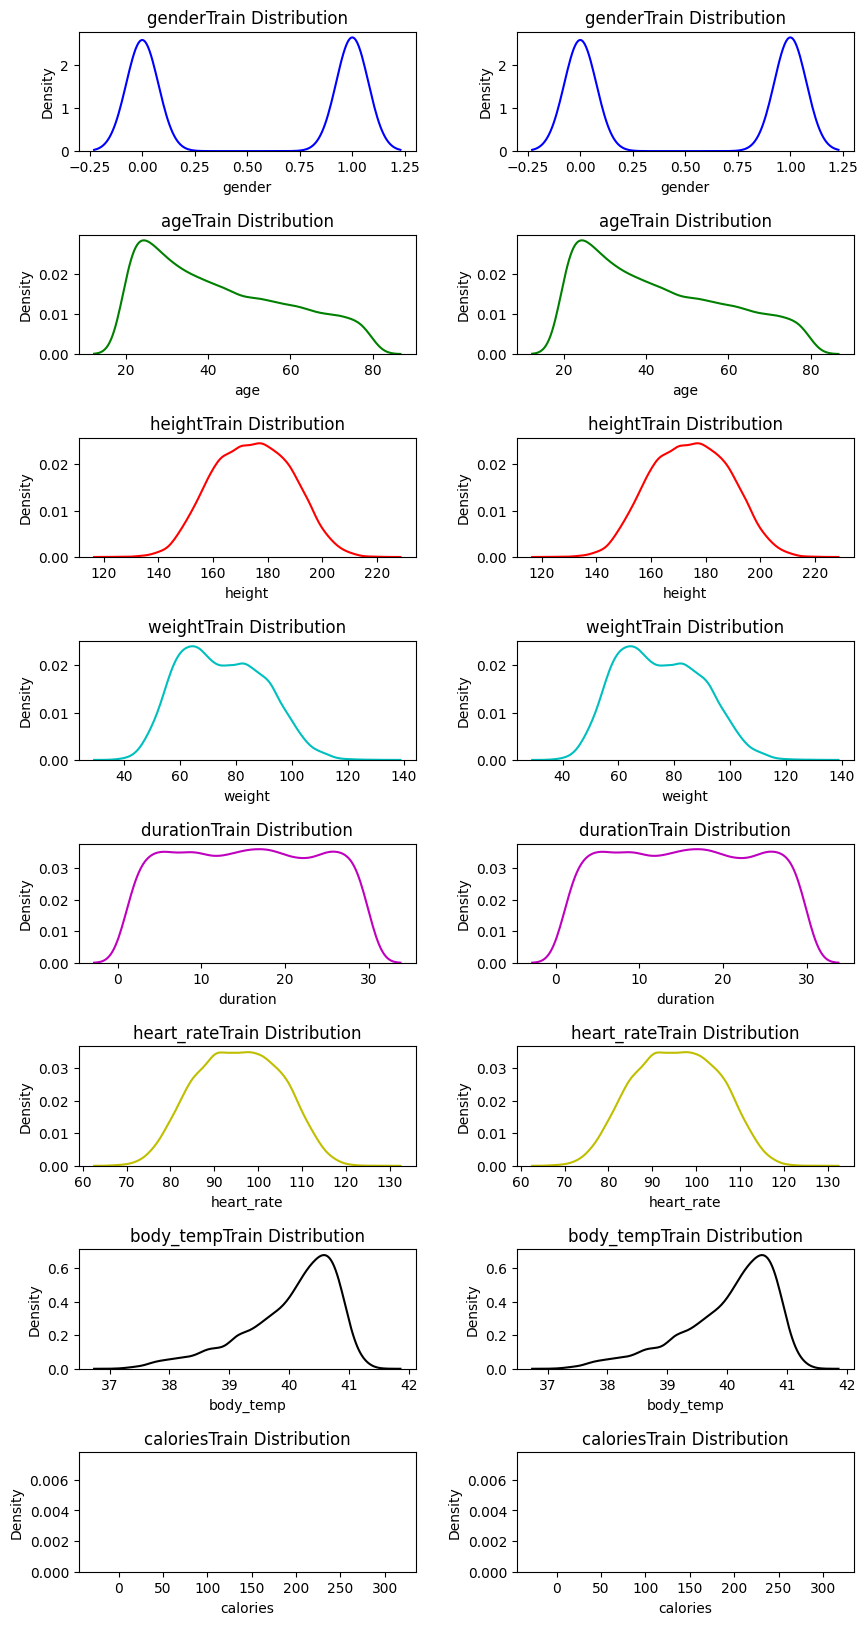

In [45]:
c= ['b','g','r','c','m','y','k','w','b']
fig1 ,axes = plt.subplots(len(calories_train.columns),2, figsize = (10,20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
axes = axes.flatten()
for i, column, color  in zip(range(0,len(calories_train.columns)*2,2), calories_train.columns,c):
  try:
    axes[i].title.set_text(column + "Train Distribution")
    sns.kdeplot(data = calories_train, x= column, ax= axes[i], color=color)
  except:
    fig1.delaxes(axes[i])
    continue

for i, column, color  in zip(range(1,len(calories_train.columns)*2,2), calories_train.columns,c):
  try:
    axes[i].title.set_text(column + "Train Distribution")
    sns.kdeplot(data = calories_train, x= column, ax= axes[i], color=color)
  except:
    fig1.delaxes(axes[i])
    continue

In [46]:
from matplotlib import style
style.use("bmh")

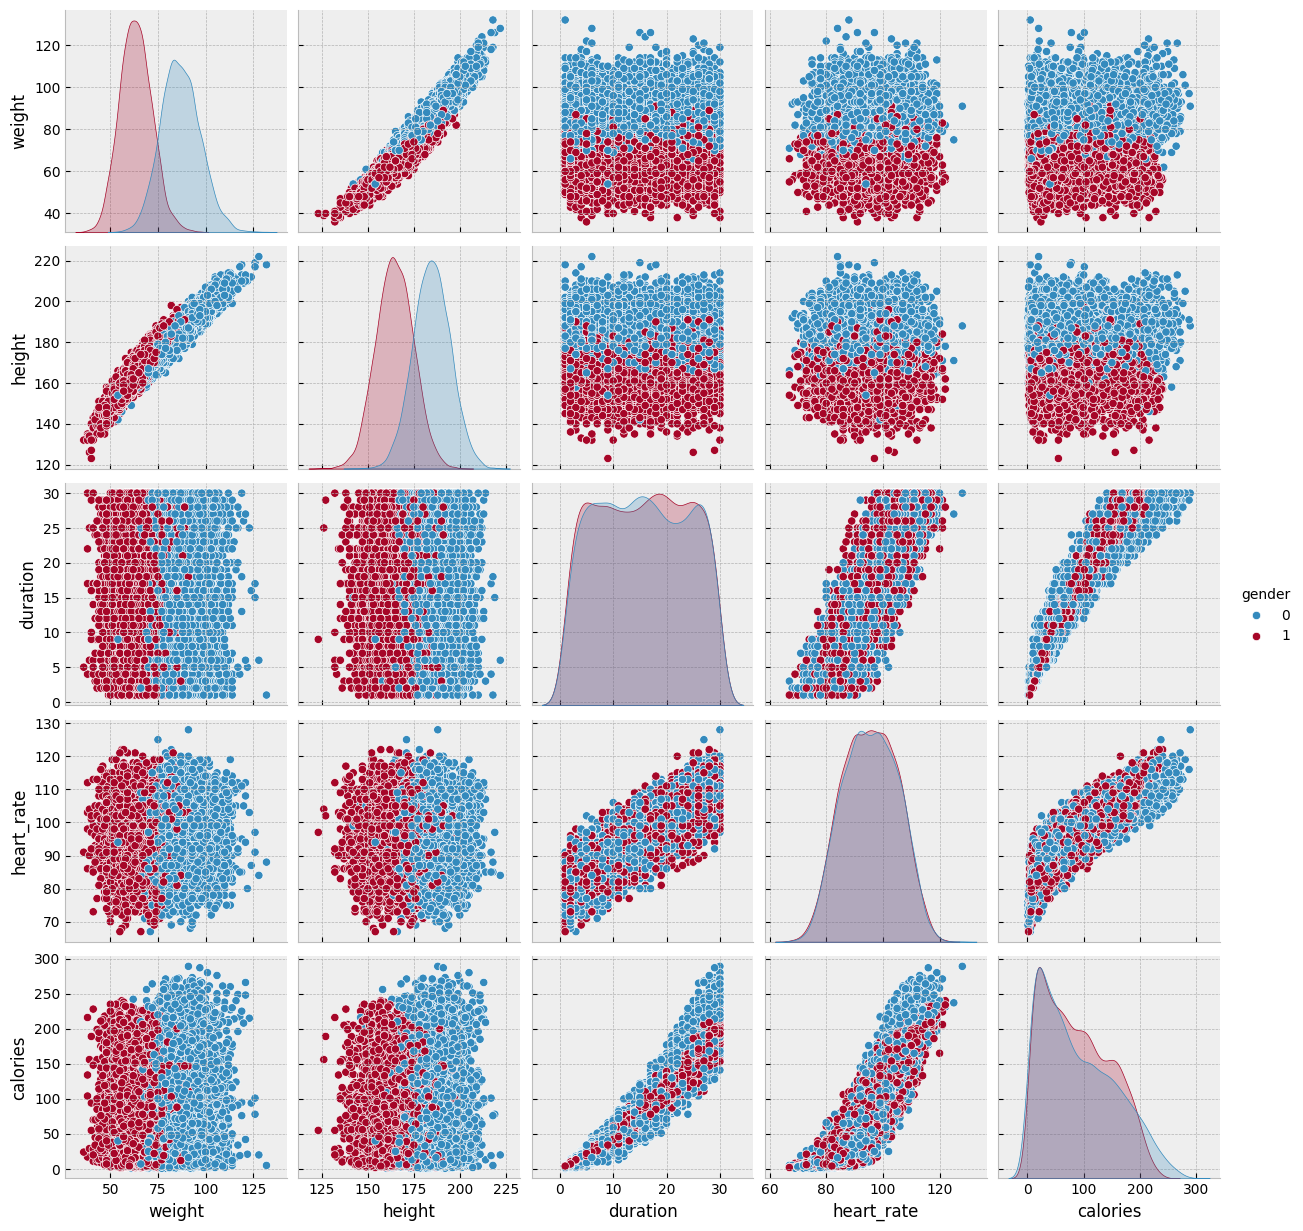

In [47]:
sns.pairplot(calories_train[['weight','height','duration','heart_rate','calories','gender']], hue='gender')

In [48]:
print("min_age in dataset:",calories_data['age'].min())
print("max_age in dataset:",calories_data['age'].max())

min_age in dataset: 20
max_age in dataset: 79


In [49]:
age_groups = ["Young", "Middle_aged", "old"]
calories_train['age_groups']= pd.cut(calories_train['age'], bins=[20,40,60,80],right = False, labels = age_groups)
calories_train['age_groups'].head()

,age_groups
2643,old
13352,old
13117,old
2560,old
14297,Middle_aged


In [50]:
calories_train['age_groups'].value_counts()

,count
age_groups,
Young,6029
Middle_aged,3535
old,2436


<Axes: xlabel='age_groups', ylabel='count'>

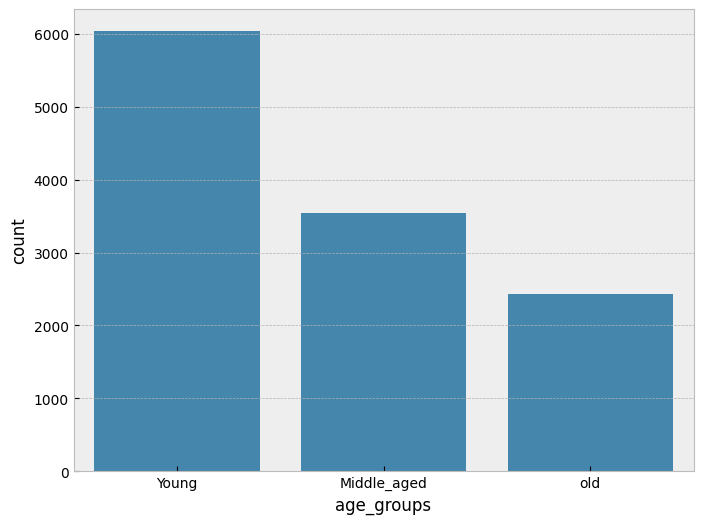

In [51]:
plt.rcParams['figure.figsize']=8,6
sns.countplot(data=calories_train,x='age_groups')

In [52]:
fig = px.box(calories_train, x='age_groups', y= 'calories', color = 'gender')
fig.update_layout(
    width=700,
    height=450,
)
fig.show()

In [53]:
print("median in dataset:",calories_train['duration'].median())
print("mean in dataset:",calories_train['duration'].mean())

median in dataset: 16.0
mean in dataset: 15.520083333333334


<Axes: xlabel='gender', ylabel='count'>

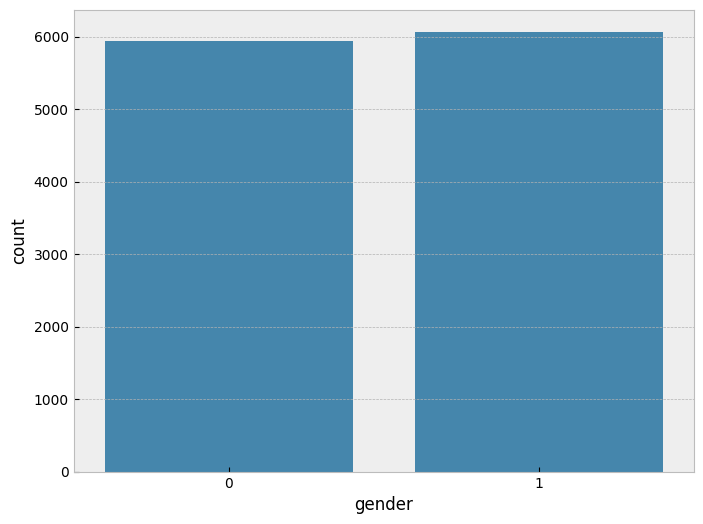

In [54]:
plt.rcParams['figure.figsize']=8,6
sns.countplot(data=calories_train,x='gender')

In [26]:
fig = px.box(calories_train, x='gender', y= 'duration')
fig.update_layout(
    width=700,
    height=450,
)
fig.show()

In [55]:
fig = px.box(calories_train, x='gender', y= 'heart_rate')
fig.update_layout(
    width=700,
    height=450,
)
fig.show()

In [56]:
for data in [calories_train, calories_test]:
  data['BMI'] = data['weight']/((data['height']/ 100)** 2)
  data['BMI'] = round(data['BMI'], 2)

In [57]:
bmi_category = ["very severely underweight","severely underweight","underweight", "normal","overweight","obese class I","obese class II","obese class III"]
calories_train["categorized_BMI"]= pd.cut(calories_train['BMI'], bins=[0,15,16,18.5,25,30,35,40,50]
                                          ,right = False, labels = bmi_category)
calories_train['categorized_BMI'] = calories_train['categorized_BMI'].astype("object")
calories_train.head()

,gender,age,height,weight,duration,heart_rate,body_temp,calories,age_groups,BMI,categorized_BMI
2643,0,62,172.0,81.0,14.0,88.0,40.5,68.0,old,27.38,overweight
13352,0,77,182.0,83.0,28.0,108.0,40.8,241.0,old,25.06,overweight
13117,1,73,170.0,71.0,16.0,91.0,40.2,83.0,old,24.57,normal
2560,0,76,176.0,81.0,24.0,94.0,40.7,154.0,old,26.15,overweight
14297,0,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle_aged,22.99,normal


In [58]:
ds = calories_train["categorized_BMI"].value_counts().reset_index()
ds.columns = ["categorized_BMI", "count"]
ds

,categorized_BMI,count
0,normal,7819
1,overweight,4181


<Axes: xlabel='categorized_BMI', ylabel='count'>

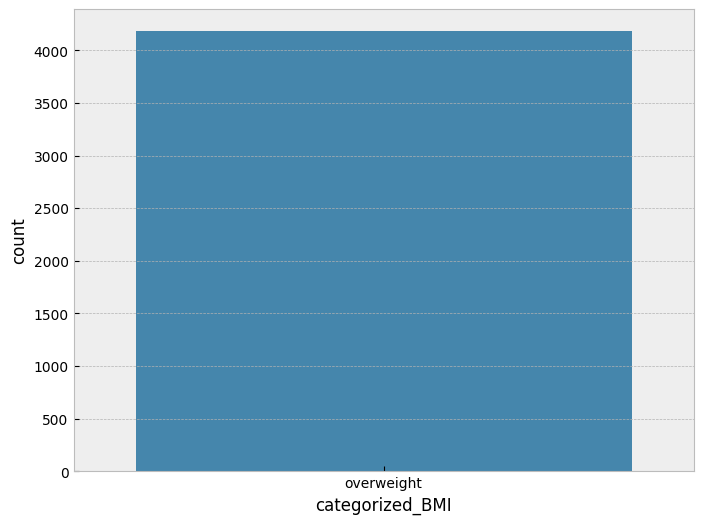

In [62]:
ds = ds[(ds['categorized_BMI']=="normal")| (ds['categorized_BMI']=="overweight")]
plt.rcParams['figure.figsize']=8,6
sns.barplot(data= ds,x='categorized_BMI', y="count")

In [65]:
ds = calories_train[["gender","categorized_BMI"]].value_counts().reset_index().sort_values(by=['gender', 'categorized_BMI'])
ds.columns = ["gender","categorized_BMI", "count"]
ds

,gender,categorized_BMI,count
2,0,normal,2247
1,0,overweight,3685
0,1,normal,5572
3,1,overweight,496


<Axes: xlabel='categorized_BMI', ylabel='count'>

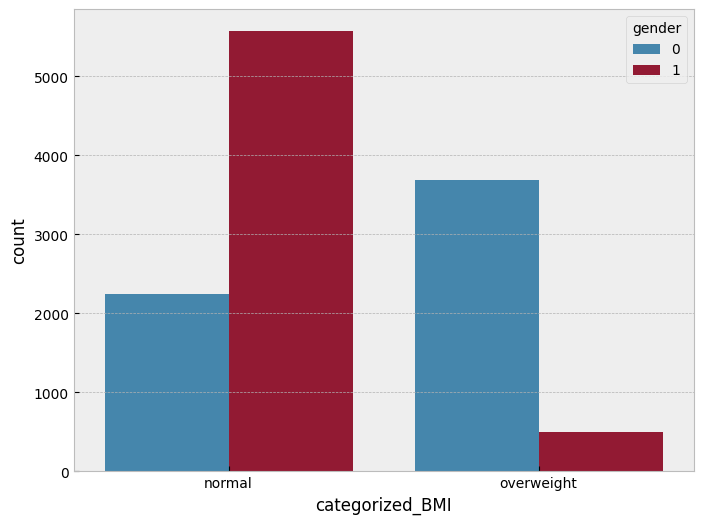

In [66]:
plt.rcParams['figure.figsize']=8,6
sns.barplot(data= ds,x='categorized_BMI', y="count", hue='gender')

In [68]:
ds = calories_train[["age_groups" ,"categorized_BMI"]].value_counts().reset_index().sort_values(by = ["age_groups" , "categorized_BMI"])
ds.columns = ["age_groups" , "categorized_BMI" , "count"]
ds

,age_groups,categorized_BMI,count
0,Young,normal,4369
2,Young,overweight,1660
1,Middle_aged,normal,2197
3,Middle_aged,overweight,1338
4,old,normal,1253
5,old,overweight,1183


<Axes: xlabel='categorized_BMI', ylabel='count'>

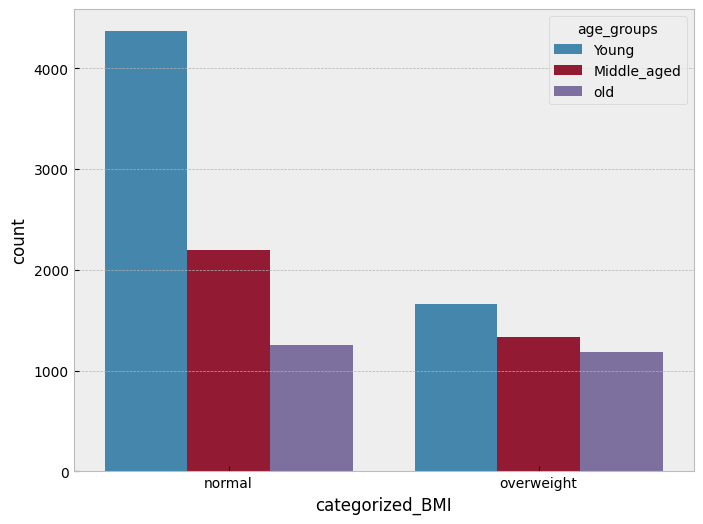

In [69]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "categorized_BMI" , y = "count" , hue = "age_groups")

In [70]:
fig = px.scatter(calories_train, x='duration', y= 'body_temp', size= 'calories')
fig.update_layout(
    width=700,
    height=450,
)
fig.show()

In [71]:
calories_train.columns

Index(['gender', 'age', 'height', 'weight', 'duration', 'heart_rate',
       'body_temp', 'calories', 'age_groups', 'BMI', 'categorized_BMI'],
      dtype='object')

<Axes: >

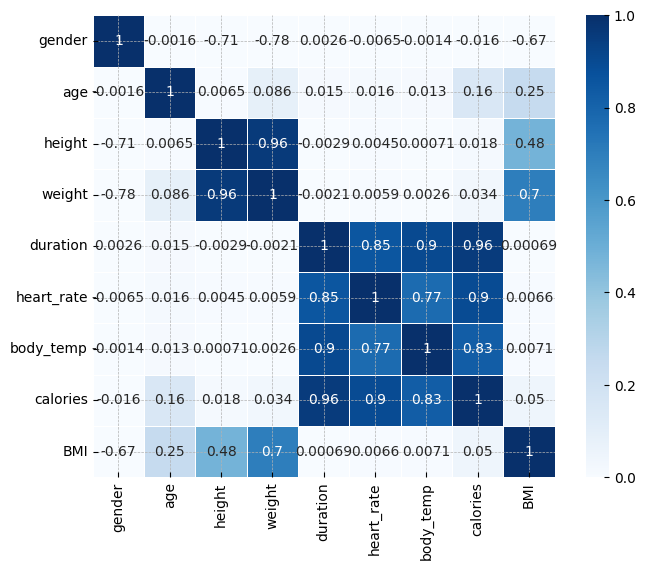

In [72]:
plt.rcParams['figure.figsize']=8,6
numerical_features = calories_train.select_dtypes(include=np.number)
corr = numerical_features.corr()
sns.heatmap(corr, annot = True, square= True, linewidth= .5, vmin = 0, vmax=1, cmap="Blues")

In [73]:
calories_train=calories_train[['gender','age','BMI','duration','heart_rate','body_temp','calories']]
calories_test=calories_test[['gender','age','BMI','duration','heart_rate','body_temp','calories']]
calories_train=pd.get_dummies(calories_train,drop_first = True)
calories_test=pd.get_dummies(calories_test,drop_first = True)

In [77]:
x_train = calories_train.drop("calories", axis=1)
y_train = calories_train["calories"]
x_test = calories_test.drop("calories", axis = 1)
y_test = calories_test["calories"]

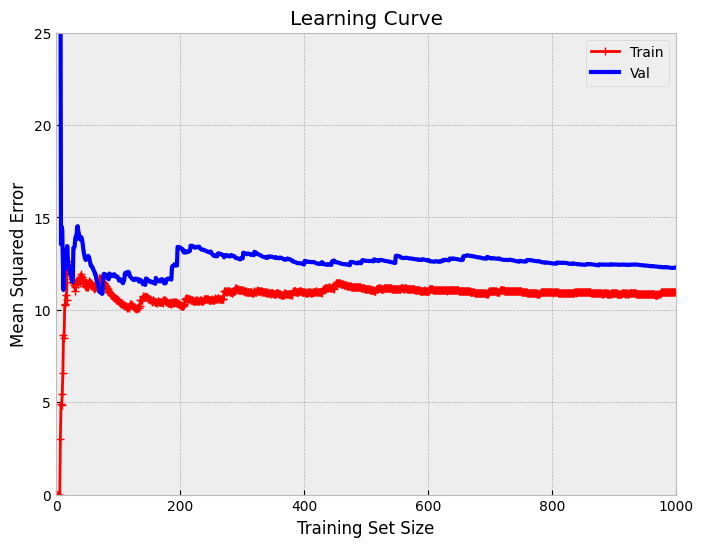

In [79]:
train_errors , val_errors = [] , []
def plot_learning_curve(model):
  for m in range(1 , 1000):
    model.fit(x_train[:m] , y_train[:m])
    y_train_predict = model.predict(x_train[:m])
    y_val_predict = model.predict(x_test[:m])
    train_errors.append(mean_squared_error(y_train[:m] , y_train_predict))
    val_errors.append(mean_squared_error(y_test[:m] , y_val_predict))

  plt.plot(np.sqrt(train_errors) , "r-+" , linewidth = 2 , label = "Train")
  plt.plot(np.sqrt(val_errors) , "b-" , linewidth = 3 , label = "Val")
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size")
  plt.ylabel("Mean Squared Error")
  plt.xlim([0 , 1000])
  plt.ylim([0 , 25])
  plt.legend()
linreg = LinearRegression()
plot_learning_curve(linreg)

In [80]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_prediction = linreg.predict(x_test)

In [81]:
print("Linear Regression Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, linreg_prediction), 2))
print("Linear Regression Mean Squared Error:", round(metrics.mean_squared_error(y_test, linreg_prediction), 2))
print("Linear Regression root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, linreg_prediction)), 2))

Linear Regression Mean Absolute Error: 8.52
Linear Regression Mean Squared Error: 140.08
Linear Regression root Mean Squared Error: 11.84


In [82]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(x_train , y_train)
random_reg_prediction = random_reg.predict(x_test)

In [85]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  5.33
RandomForest Mean Squared Error(MSE) :  69.13
RandomForest Root Mean Squared Error(RMSE) :  8.31


In [86]:
calories_train.iloc[32]

,5897
gender,0.00
age,23.00
BMI,24.88
duration,27.00
heart_rate,102.00
body_temp,40.30
calories,140.00


In [87]:
X_arr = np.array([[24 , 25 , 28 , 100 , 40 , 1]]).reshape(1 , -1)
y_pred = random_reg.predict(X_arr)
print("Prediction : " , round(y_pred[0] , 2))

Prediction :  109.4
